1. Veri okuma

Veri setinden gereksiz sütun ('Patient_ID') analiz için gereksiz olduğu için çıkarıldı.

In [20]:
import pandas as pd

file_path = "datasets/thyroid_cancer_risk_data.csv"
df = pd.read_csv(file_path)

df.drop(columns=["Patient_ID"], inplace=True)  # Gereksiz sütunları kaldırma

df.head() 

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


2. Veri Önişleme

Kategorik verileri makine öğrenmesi modellerinin anlayabileceği sayısal formatlara çeviriyoruz.
LabelEncoder kullanılarak her kategorik değişken sayısal değerlere dönüştürülüyor.

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ["Gender", "Country", "Ethnicity", "Family_History", "Radiation_Exposure",
                        "Iodine_Deficiency", "Smoking", "Obesity", "Diabetes", "Thyroid_Cancer_Risk", "Diagnosis"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

df.head()  # Dönüştürülmüş veriyi görüntüle

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,1,6,2,0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,0
1,29,1,2,3,0,1,0,0,0,0,1.83,1.73,10.54,4.05,1,0
2,86,1,5,2,0,0,0,0,0,0,6.26,2.59,10.57,4.61,1,0
3,75,0,3,1,0,0,0,0,0,0,4.10,2.62,11.04,2.46,2,0
4,35,0,2,0,1,1,0,0,0,0,9.10,2.11,10.71,2.11,0,0


2.1. Sınıf Dengesizliğini SMOTE ile ortadan kaldırma

Veride dengesiz sınıf dağılımı olup olmadığını görselleştiriyoruz.
Eğer dengesizlik varsa, SMOTE yöntemi ile örneklemeyi dengeleyerek yeni veri noktaları üretildi.

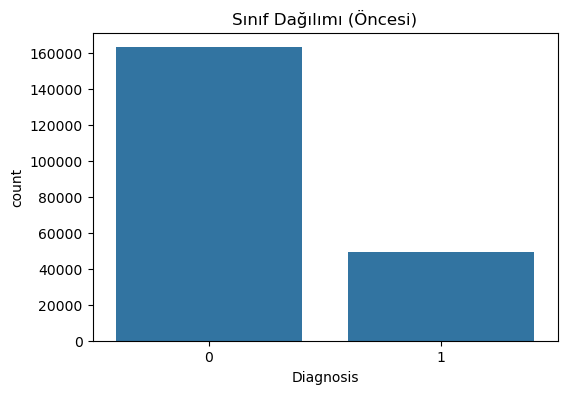

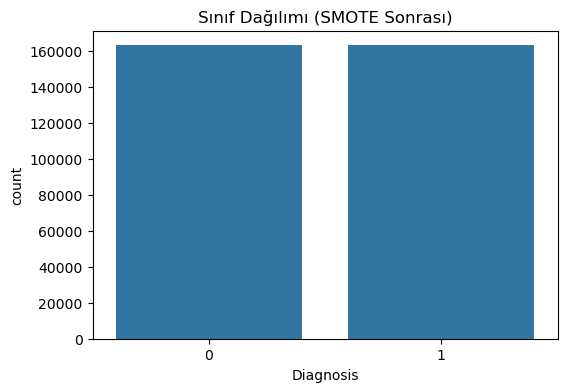

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

plt.figure(figsize=(6,4))
sns.countplot(x=df["Diagnosis"])
plt.title("Sınıf Dağılımı (Öncesi)")
plt.show()

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled)
plt.title("Sınıf Dağılımı (SMOTE Sonrası)")
plt.show()


2.2. Veriyi Ölçeklendirme

Modelin sağlıklı çalışabilmesi için sayısal değişkenler standart bir ölçeğe getirildi.
StandardScaler kullanarak verileri ortalaması 0, standart sapması 1 olacak şekilde dönüştürüldü.

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

3. Yeni verisetini oluşturma ve kaydetme

Ön işlenmiş veriyi tekrar yeni bir veri setine çevrildi ve analiz - modelleme için kaydedildi.
Ön işlenmiş veri kümesi yeni bir CSV dosyası olarak kaydedildi.

In [25]:
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df["Diagnosis"] = y_resampled.reset_index(drop=True)

output_file_path = "datasets/new_processed_thyroid_cancer_data.csv"
processed_df.to_csv(output_file_path, index=False)

print(f"Ön işlenmiş veri kümesi başarıyla kaydedildi: {output_file_path}")

Ön işlenmiş veri kümesi başarıyla kaydedildi: datasets/new_processed_thyroid_cancer_data.csv
